In [1]:
import tensorflow as tf
import os
import numpy as np
import re
from PIL import Image
import matplotlib.pyplot as plt

D:\Anaconda\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Anaconda\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Anaconda\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Anaconda\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWa

retrain/images/animal1.jpg


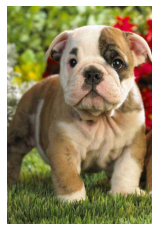

[0 1 4 3 2]
animal (score = 0.78500)
flowers (score = 0.10422)
plane (score = 0.04081)
house (score = 0.04065)
guitar (score = 0.02932)

retrain/images/animal2.jpg


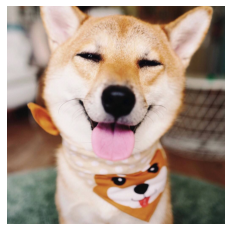

[0 1 3 4 2]
animal (score = 0.75560)
flowers (score = 0.07908)
house (score = 0.06975)
plane (score = 0.05496)
guitar (score = 0.04061)

retrain/images/animal3.jpg


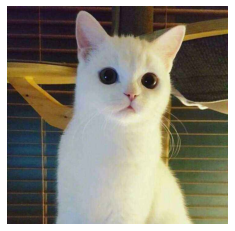

[0 1 3 2 4]
animal (score = 0.92602)
flowers (score = 0.03548)
house (score = 0.01889)
guitar (score = 0.01154)
plane (score = 0.00807)

retrain/images/flower1.jpg


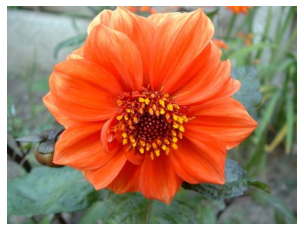

[1 0 3 2 4]
flowers (score = 0.97447)
animal (score = 0.01674)
house (score = 0.00345)
guitar (score = 0.00292)
plane (score = 0.00241)

retrain/images/flower2.jpg


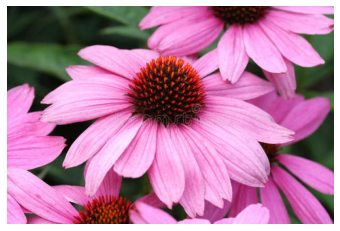

[1 0 4 2 3]
flowers (score = 0.95928)
animal (score = 0.02163)
plane (score = 0.00748)
guitar (score = 0.00739)
house (score = 0.00421)

retrain/images/flower3.jpg


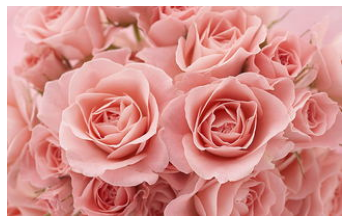

[0 1 3 4 2]
animal (score = 0.72927)
flowers (score = 0.23672)
house (score = 0.01447)
plane (score = 0.01243)
guitar (score = 0.00711)

retrain/images/guitar1.jpg


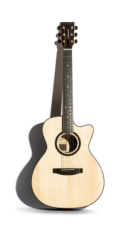

[2 0 1 4 3]
guitar (score = 0.87856)
animal (score = 0.06008)
flowers (score = 0.02852)
plane (score = 0.02096)
house (score = 0.01189)

retrain/images/guitar2.jpg


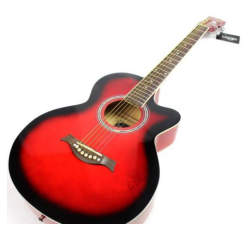

[2 0 4 1 3]
guitar (score = 0.82868)
animal (score = 0.09192)
plane (score = 0.03180)
flowers (score = 0.03078)
house (score = 0.01682)

retrain/images/guitar3.jpg


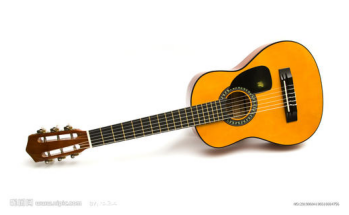

[2 0 1 4 3]
guitar (score = 0.89623)
animal (score = 0.06113)
flowers (score = 0.01825)
plane (score = 0.01381)
house (score = 0.01058)

retrain/images/house1.jpg


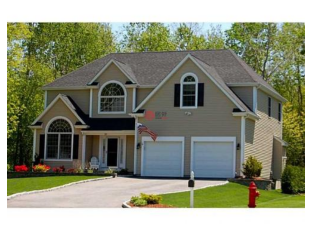

[3 0 1 2 4]
house (score = 0.91660)
animal (score = 0.04262)
flowers (score = 0.02595)
guitar (score = 0.00769)
plane (score = 0.00714)

retrain/images/house2.jpg


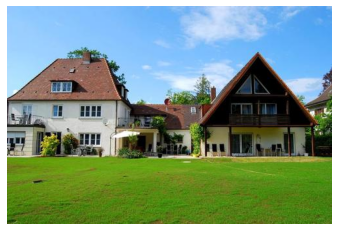

[3 0 1 2 4]
house (score = 0.91099)
animal (score = 0.05370)
flowers (score = 0.02264)
guitar (score = 0.00728)
plane (score = 0.00539)

retrain/images/house3.jpg


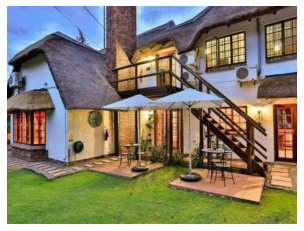

[3 0 1 2 4]
house (score = 0.88700)
animal (score = 0.07380)
flowers (score = 0.02507)
guitar (score = 0.00771)
plane (score = 0.00642)

retrain/images/plane1.jpg


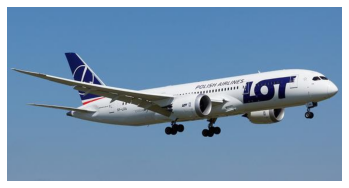

[4 0 2 3 1]
plane (score = 0.96175)
animal (score = 0.02175)
guitar (score = 0.00595)
house (score = 0.00536)
flowers (score = 0.00519)

retrain/images/plane2.jpg


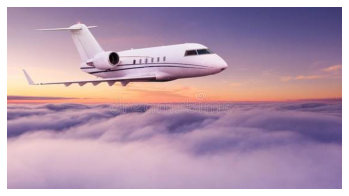

[4 0 1 3 2]
plane (score = 0.91843)
animal (score = 0.03345)
flowers (score = 0.01740)
house (score = 0.01591)
guitar (score = 0.01481)

retrain/images/plane3.jpg


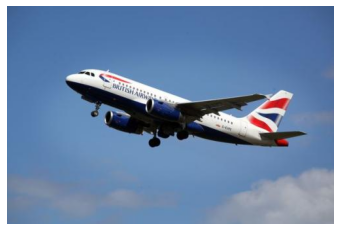

[4 0 2 3 1]
plane (score = 0.97486)
animal (score = 0.01401)
guitar (score = 0.00407)
house (score = 0.00375)
flowers (score = 0.00331)



In [2]:
lines = tf.gfile.GFile('retrain/output_labels.txt').readlines()
uid_to_human = {}
#一行一行读取数据
for uid,line in enumerate(lines) :
    #去掉换行符
    line=line.strip('\n')
    uid_to_human[uid] = line

def id_to_string(node_id):
    if node_id not in uid_to_human:
        return ''
    return uid_to_human[node_id]


#创建一个图来存放google训练好的模型
with tf.gfile.FastGFile('retrain/output_graph.pb', 'rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())
    tf.import_graph_def(graph_def, name='')


with tf.Session() as sess:
    softmax_tensor = sess.graph.get_tensor_by_name('final_result:0')
    #遍历目录
    for root,dirs,files in os.walk('retrain/images/'):
        for file in files:
            #载入图片
            image_data = tf.gfile.FastGFile(os.path.join(root,file), 'rb').read()
            predictions = sess.run(softmax_tensor,{'DecodeJpeg/contents:0': image_data})#图片格式是jpg格式
            predictions = np.squeeze(predictions)#把结果转为1维数据

            #打印图片路径及名称
            image_path = os.path.join(root,file)
            print(image_path)
            #显示图片
            img=Image.open(image_path)
            plt.imshow(img)
            plt.axis('off')
            plt.show()

            #排序
            top_k = predictions.argsort()[::-1]
            print(top_k)
            for node_id in top_k:     
                #获取分类名称
                human_string = id_to_string(node_id)
                #获取该分类的置信度
                score = predictions[node_id]
                print('%s (score = %.5f)' % (human_string, score))
            print()